# Overview of Hostile Post Detection in Hindi
- **Goals:** To predict the label set of the set of post collected from Twitter and facebook.

- **Traning data:** post with their label.

- **Tesing data:** set of posts.
- **Types of post:** 
1. *Fake News:* A claim or information that is verified to be not true.
2. *Hate Speech:* A post targeting a specific group of people based on their ethnicity, religious beliefs, geographical belonging, race, etc., with malicious intentions of spreading hate or encouraging violence.
3. *Offensive:* A post containing profanity, impolite, rude, or vulgar language to insult a targeted individual or group.
4. *Defamation:* A mis-information regarding an individual or group.
5. *Non-hostile:* A post without any hostility.

## Exploring dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load data

data = pd.read_csv("consumption.csv")

In [3]:
# How many posts do we have in training set

print("We have", data.shape[0], "posts in the training set.")

We have 3248 posts in the training set.


In [4]:
data.head()

,meter_id,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,...,2017-12-31 19:00:00,2017-12-31 19:30:00,2017-12-31 20:00:00,2017-12-31 20:30:00,2017-12-31 21:00:00,2017-12-31 21:30:00,2017-12-31 22:00:00,2017-12-31 22:30:00,2017-12-31 23:00:00,2017-12-31 23:30:00
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.052,0.091,0.083,0.082,0.090,0.074,0.092,0.076,0.055,0.036
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.402,0.639,0.537,0.834,0.868,0.394,0.073,0.077,0.049,0.048
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.110,0.123,0.012,0.034,0.006,0.027,0.001,0.044,0.004,0.035
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.118,0.096,0.135,0.041,0.018,0.057,0.018,0.038,0.040,0.014
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022,0.010,0.036,0.006,0.024,0.014,0.028,0.006,0.024,0.025


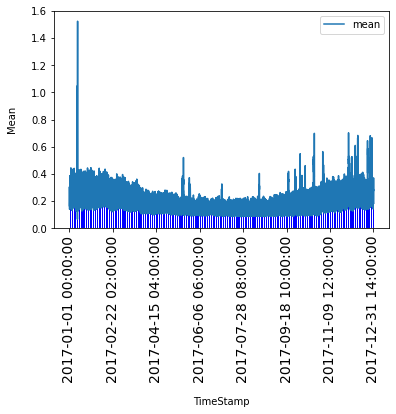

In [9]:
allMean=[]
indexes=[]
for i in data.columns:
    if i!='meter_id':
        allMean.append(np.mean(data[i]))
        indexes.append(i)
        
df = pd.DataFrame({
   'mean': allMean
   }, index=indexes)
lines = df.plot.line(rot=90)



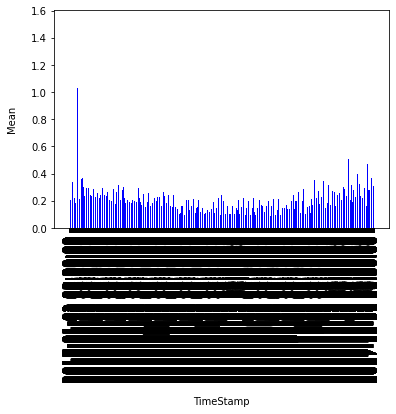

In [11]:
plt.bar(indexes, allMean, 0.6, color=['b'])
plt.xlabel("TimeStamp", labelpad=14)
plt.ylabel("Mean", labelpad=14)
plt.xticks(fontsize=14, rotation=90)
plt.show()

In [8]:
#removing extra columns

data=data.drop(data.columns[[0,3,4]], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Post        5728 non-null   object
 1   Labels Set  5728 non-null   object
dtypes: object(2)
memory usage: 89.6+ KB


In [10]:
data.head()

,Post,Labels Set
0,मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...,"hate,offensive"
1,सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...,non-hostile
2,"सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...",non-hostile
3,@prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...,"defamation,offensive"
4,#unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...,non-hostile


In [11]:
data.tail()

,Post,Labels Set
5723,उदितराज जी हिम्मत जुटा कर उस नेता के लिए कुछ ...,hate
5724,उप्र: पीएम रिपोर्ट में खुलासा: हार्टअटैक से हु...,non-hostile
5725,नौकरी गंवा चुके दोस्त की मदद: नगद के बजाए गिफ्...,non-hostile
5726,बंगाल में हिन्दू मरे हैं इसलिए मुझे कोई फर्क न...,fake
5727,रक्षा मंत्री @rajnathsingh ने पूर्व राष्ट्रपति...,non-hostile


In [12]:
#Calculating the null values in each columns

data.isnull().sum()

Post          0
Labels Set    0
dtype: int64

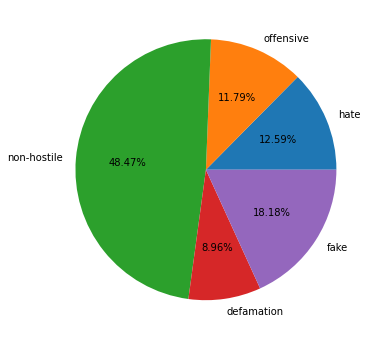

In [13]:
#pie chart creation

d={}
for i in data['Labels Set']:
    ar=list(i.split(','))
    for j in ar:
        try:
            d[j]+=1
        except:
            d[j]=1

labels = list(d.keys())
values = list(d.values())
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels,autopct="%1.2f%%")
plt.show()

Analysis:

1) We observe that non-hostile posts has the highest proportion.